<a href="https://colab.research.google.com/github/theyastustory/MERGE-Project/blob/main/COVID_19_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
library(readr)
library(dplyr)
library(ggplot2)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
#Reading datasets/confirmed_cases_worldwide.csv into confirmed_cases_worldwide

confirmed_cases_worldwide <-  read_csv("confirmed_cases_worldwide.csv")




── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_date(format = ""),
  cum_cases = col_double()
)




In [12]:
#Printing out confirmed_cases_worldwide

confirmed_cases_worldwide

date,cum_cases
<date>,<dbl>
2020-01-22,555
2020-01-23,653
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
2020-01-27,2927
2020-01-28,5578
2020-01-29,6166
2020-01-30,8234


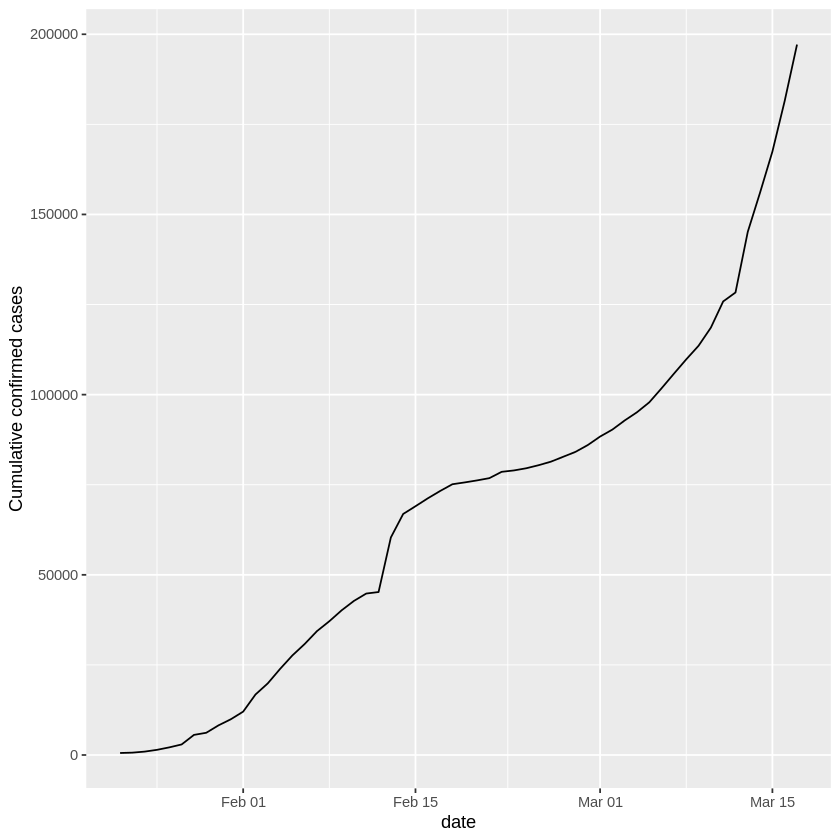

In [13]:
# Drawing a line plot of cumulative cases vs. date
# Labelling the y-axis

ggplot(confirmed_cases_worldwide, aes(date, cum_cases)) +
  geom_line() +
  ylab("Cumulative confirmed cases")


── Column specification ────────────────────────────────────────────────────────
cols(
  is_china = col_character(),
  date = col_date(format = ""),
  cases = col_double(),
  cum_cases = col_double()
)




Rows: 112
Columns: 4
$ is_china  <chr> "China", "China", "China", "China", "China", "China", "China…
$ date      <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26,…
$ cases     <dbl> 548, 95, 277, 486, 669, 802, 2632, 578, 2054, 1661, 2089, 47…
$ cum_cases <dbl> 548, 643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802, 118…


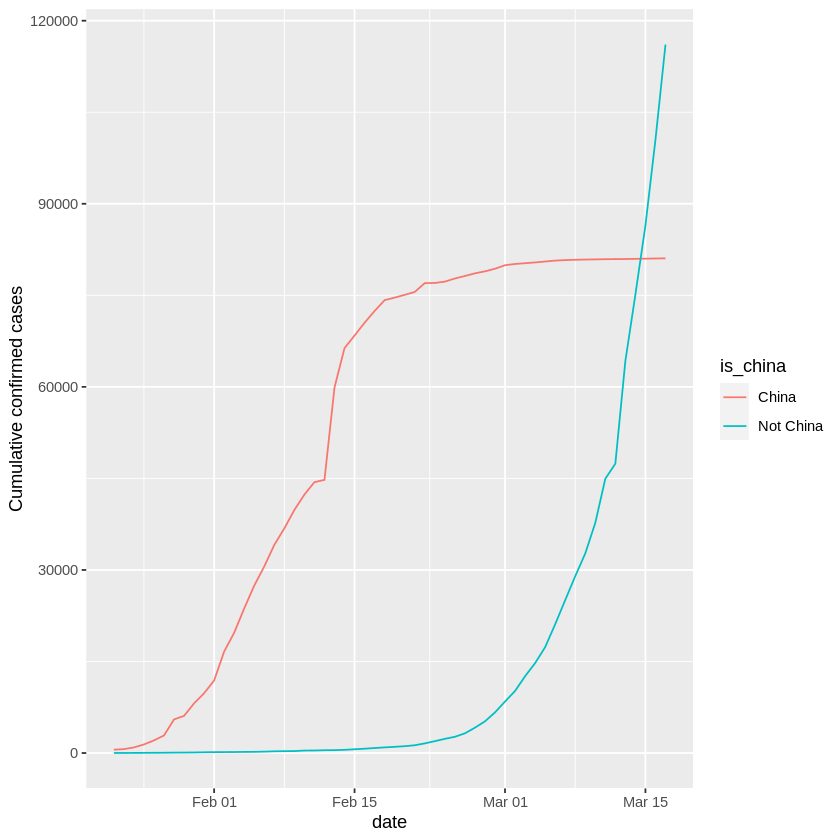

In [18]:
# Read in datasets/confirmed_cases_china_vs_world.csv

confirmed_cases_china_vs_world <- read_csv("confirmed_cases_china_vs_world.csv")
# Seeing the result
glimpse(confirmed_cases_china_vs_world)
# Drawing a line plot of cumulative cases vs. date, grouped and colored by is_china
# Defining aesthetics within the line geom
plt_cum_confirmed_cases_china_vs_world <- ggplot(confirmed_cases_china_vs_world) +
  geom_line(aes(date, cum_cases, group = is_china, color = is_china)) +
  ylab("Cumulative confirmed cases")

# Seeing the result

plt_cum_confirmed_cases_china_vs_world

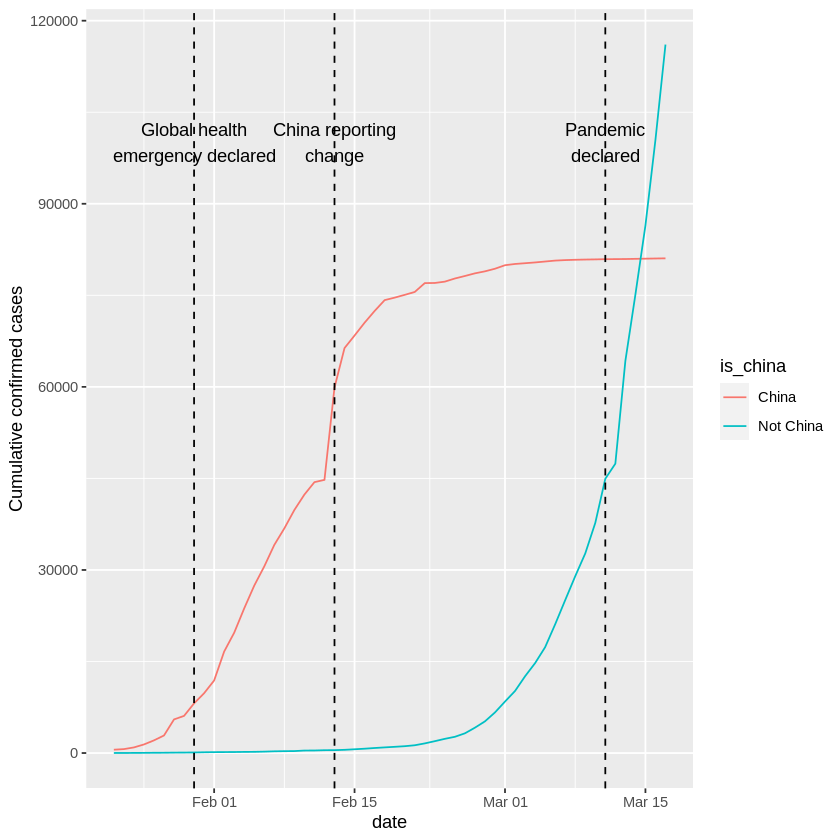

In [19]:
who_events <- tribble(
  ~ date, ~ event,
  "2020-01-30", "Global health\nemergency declared",
  "2020-03-11", "Pandemic\ndeclared",
  "2020-02-13", "China reporting\nchange"
) %>%
  mutate(date = as.Date(date))

# Using who_events, adding vertical dashed lines with an x-intercept at date and text at date, labeled by event, and at 100000 on the y-axis

plt_cum_confirmed_cases_china_vs_world +
  geom_vline(aes(xintercept = date), data = who_events, linetype = "dashed") +
  geom_text(aes(date, label = event), data = who_events, y = 1e5)


`geom_smooth()` using formula 'y ~ x'



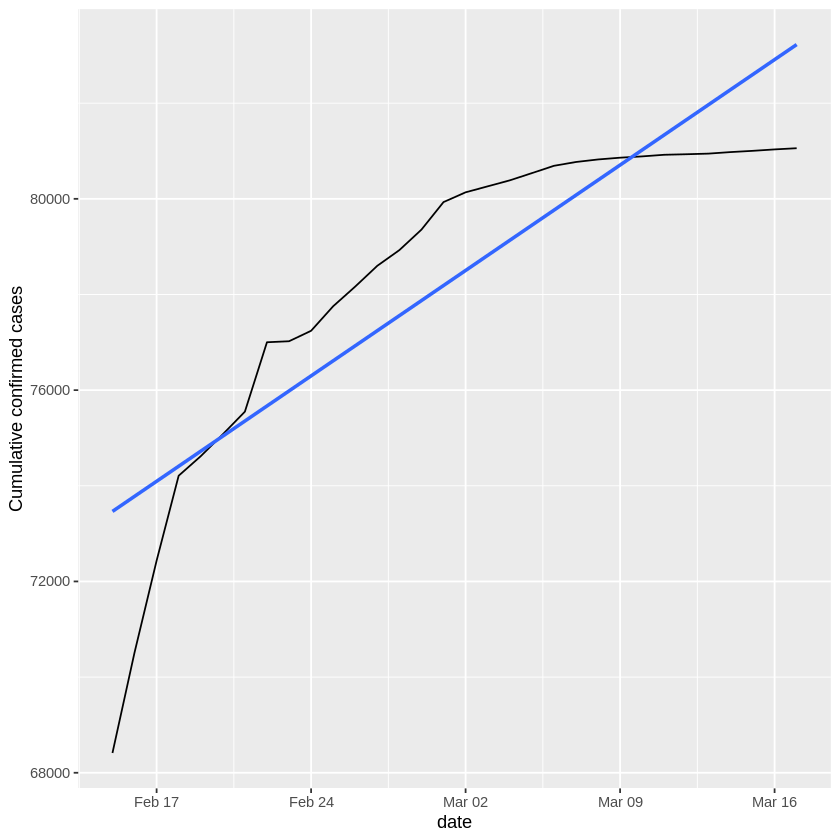

In [20]:
# Filtering for China, from Feb 15

china_after_feb15 <- confirmed_cases_china_vs_world %>%
  filter(is_china == "China", date >= "2020-02-15")

# Using china_after_feb15, drawing a line plot cum_cases vs. date
# Adding a smooth trend line using linear regression, no error bars

ggplot(china_after_feb15, aes(date, cum_cases)) +
  geom_line() +
  geom_smooth(method = "lm", se = FALSE) +
  ylab("Cumulative confirmed cases")

`geom_smooth()` using formula 'y ~ x'



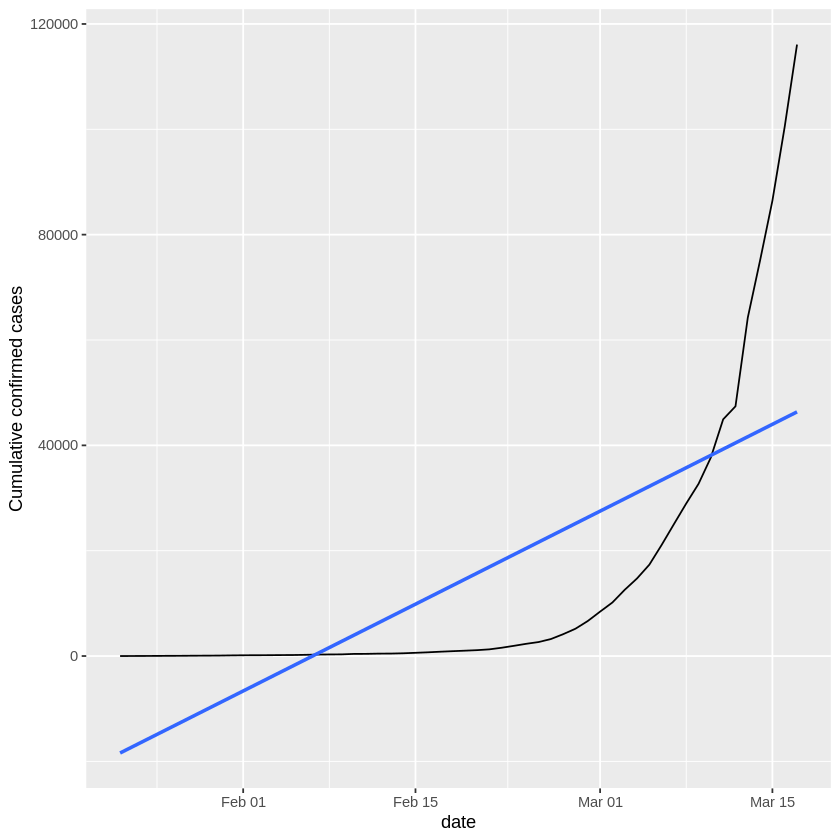

In [27]:
# Filter confirmed_cases_china_vs_world for not China
not_china <- confirmed_cases_china_vs_world %>%
  filter(is_china == 'Not China')

# Using not_china, draw a line plot cum_cases vs. date
# Add a smooth trend line using linear regression, no error bars
plt_not_china_trend_lin <- ggplot(not_china, aes(x=date, y=cum_cases)) +
  geom_line() +
  geom_smooth(method='lm', se=FALSE) +
  ylab("Cumulative confirmed cases")

# See the result
plt_not_china_trend_lin 

`geom_smooth()` using formula 'y ~ x'



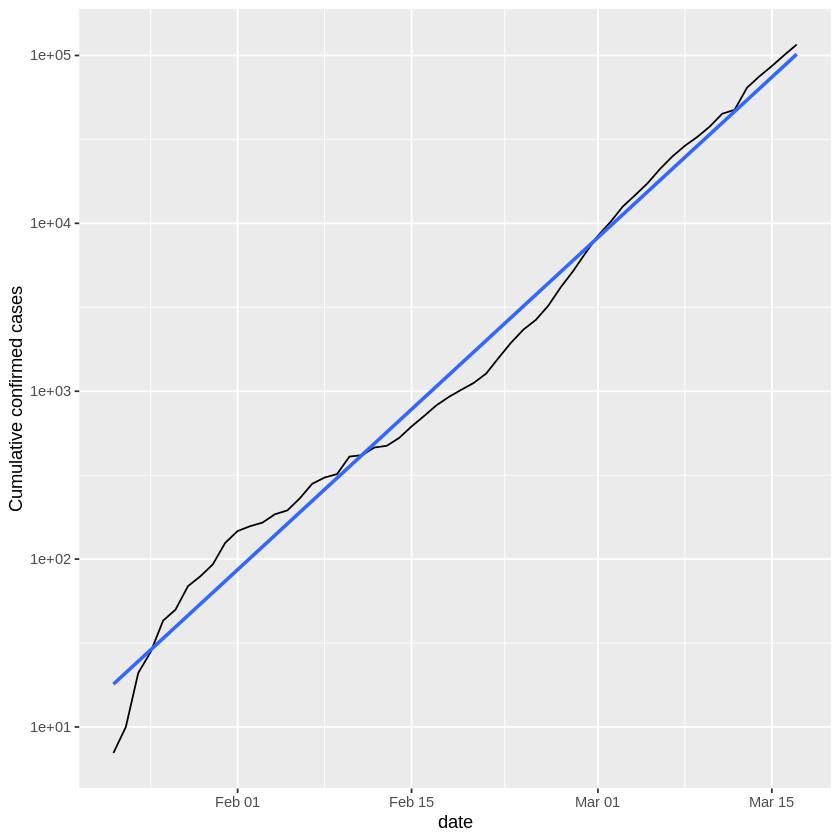

In [28]:
# Modify the plot to use a logarithmic scale on the y-axis
plt_not_china_trend_lin + 
  scale_y_log10()

In [29]:
# Run this to get the data for each country
confirmed_cases_by_country <- read_csv("confirmed_cases_by_country.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  province = col_character(),
  date = col_date(format = ""),
  cases = col_double(),
  cum_cases = col_double()
)




In [30]:
glimpse(confirmed_cases_by_country)

Rows: 13,272
Columns: 5
$ country   <chr> "Afghanistan", "Albania", "Algeria", "Andorra", "Antigua and…
$ province  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ date      <date> 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22,…
$ cases     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ cum_cases <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [31]:
# Group by country, summarize to calculate total cases, find the top 7
top_countries_by_total_cases <- confirmed_cases_by_country %>%
  group_by(country) %>%
  summarize(total_cases = max(cum_cases)) %>%
  top_n(7)

Selecting by total_cases



In [32]:
# See the result
top_countries_by_total_cases

country,total_cases
<chr>,<dbl>
France,7699
Germany,9257
Iran,16169
Italy,31506
"Korea, South",8320
Spain,11748
US,6421


In [35]:
# Run this to get the data for the top 7 countries
confirmed_cases_top7_outside_china <- read_csv('confirmed_cases_top7_outside_china.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  date = col_date(format = ""),
  cum_cases = col_double()
)




In [36]:
# 
glimpse(confirmed_cases_top7_outside_china)


Rows: 2,030
Columns: 3
$ country   <chr> "Germany", "Iran", "Italy", "Korea, South", "Spain", "US", "…
$ date      <date> 2020-02-18, 2020-02-18, 2020-02-18, 2020-02-18, 2020-02-18,…
$ cum_cases <dbl> 16, 0, 3, 31, 2, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,…


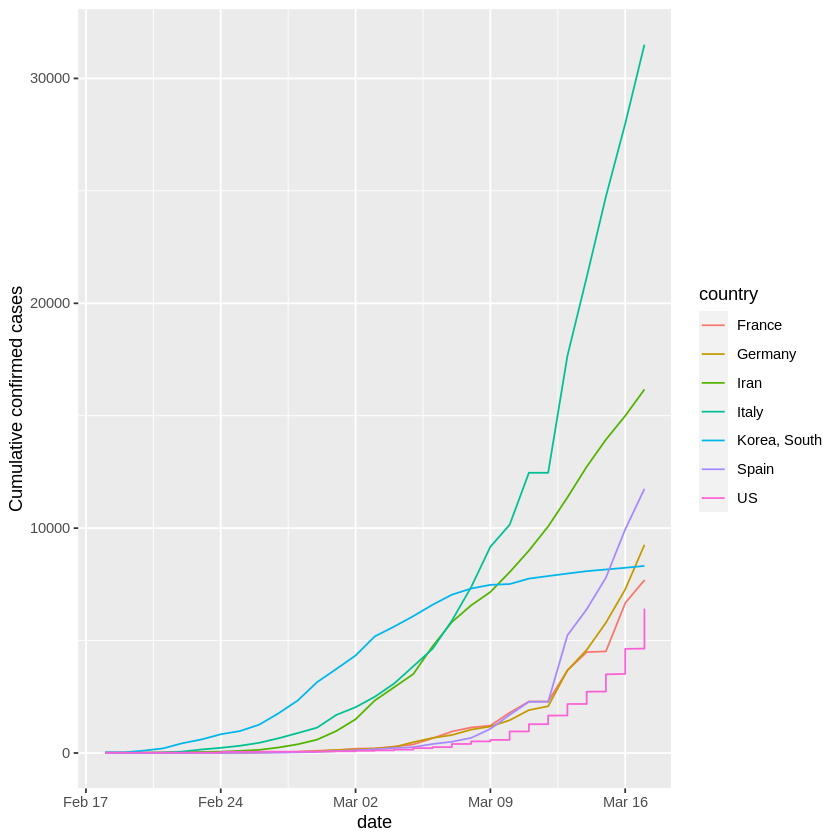

In [37]:
# Using confirmed_cases_top7_outside_china, draw a line plot of
# cum_cases vs. date, grouped and colored by country
ggplot(confirmed_cases_top7_outside_china, aes(x=date, y=cum_cases, group=country, color=country))+
  geom_line()+
  ylab('Cumulative confirmed cases')